# 아이스크림 매장 매출 분석
- 데이터셋 : "달콤아이스크림" 매장의 2021년 2월부터 2022년 7월까지 약 1년 6개월간의 키오스크 기록 데이터
- 약 50만 건
- 데이터 출처 : 본인

## data description

- menu_list :
- price_increase :
- sales_creditcard :
- sales_hourly :
- sales_monthly :
- salse_dayoftheweek:
- sales_bymenu:

In [1]:
import sys
sys.executable

'c:\\Users\\09048\\2026project\\icecream-sales-forecasting\\venv\\Scripts\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 경로
data_path = '../01_Data/raw/'

icecream = pd.read_csv(data_path + 'icecream.csv')
menu_list = pd.read_csv(data_path + 'menu_list.csv')
price_increase = pd.read_csv(data_path + 'price_increase.csv')
sales_bymenu = pd.read_csv(data_path + 'sales_bymenu.csv')
sales_creditcard = pd.read_csv(data_path + 'sales_creditcard.csv')
sales_dayoftheweek = pd.read_csv(data_path + 'sales_dayoftheweek.csv')
sales_hourly = pd.read_csv(data_path + 'sales_hourly.csv')
sales_monthly = pd.read_csv(data_path + 'sales_monthly.csv')

C:\Users\09048\AppData\Local\Temp\ipykernel_1672\1655386509.py:4: DtypeWarning: Columns (0: 신용카드승인내역_주문내역, 1: Column5, 2: Column6, 3: Column7, 4: Column12, 5: Column13, 6: Column16, 7: Column17) have mixed types. Specify dtype option on import or set low_memory=False.
  icecream = pd.read_csv(data_path + 'icecream.csv')
C:\Users\09048\AppData\Local\Temp\ipykernel_1672\1655386509.py:8: DtypeWarning: Columns (0: 신용카드승인내역_주문내역, 1: Column5, 2: Column6, 3: Column7, 4: Column12, 5: Column13, 6: Column16, 7: Column17) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_creditcard = pd.read_csv(data_path + 'sales_creditcard.csv')


In [4]:

icecream.head()

,Source.Name,신용카드승인내역_주문내역,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0


In [5]:
menu_list.head()

,분류,메뉴코드,바코드번호,관리메뉴명,메뉴명_한국어,메뉴명_영어,메뉴명_일본어,메뉴명_중국어,메뉴설명_한국어,메뉴설명_영어,...,판매갯수제한,판매여부,성인인증여부,과세여부,표시시작일자,표시종료일자,판매불가요일,연동코드,매입처,야간가격
0,상품,B0000003,8801104123181,비비빅,비비빅,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
1,상품,B0000004,8801104123174,메로나,메로나,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
2,상품,B0000005,8801019508356,누가바,누가바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
3,상품,B0000006,8801019508431,쌍쌍바,쌍쌍바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
4,상품,B0000007,8801019508363,바밤바,바밤바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN


In [6]:
sales_bymenu.head()

,메뉴별 매출현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,메뉴코드,바코드번호,메뉴명,분류명,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,객단가,판매수량,판매옵션수량,구성비(%)
2,B0000267,8801104306928,떡붕어싸만코,상품,380,749000,0,380,749000,68152,680848,1000,749,0,2.09%
3,B0000703,NaN,마카롱,이용안내,212,746000,0,212,746000,67857,678143,2000,373,0,2.08%
4,B0000142,8801104163057,엑셀런트,상품,73,738500,0,73,738500,67129,671371,5956,124,0,2.06%


In [7]:
sales_creditcard.head()

,Source.Name,신용카드승인내역_주문내역,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0


In [8]:
sales_dayoftheweek.head()

,요일별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,요일,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,영업일자,주간평균,주문단가,구성비(%)
2,일요일,2290.0,12130200,40900.0,2288.0,12081100,1098261.0,10982839,101.0,1725871.0,5280.0,17.25%
3,월요일,1850.0,8339300.0,27500.0,1850.0,8311800.0,755596.0,7556204.0,101.0,1187400.0,4493.0,11.87%
4,화요일,2082.0,8614800.0,37200.0,2076.0,8572000.0,779245.0,7792755.0,102.0,1224571.0,4129.0,12.24%


In [9]:
sales_hourly.head()

,시간대별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,시간대,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,주문단가,구성비(%)
2,00 ~ 01,516.0,2168600.0,11300.0,516.0,2157300.0,196123.0,1961177.0,4181.0,3.08%
3,01 ~ 02,277.0,1044800.0,2300.0,277.0,1042500.0,94766.0,947734.0,3764.0,1.49%
4,02 ~ 03,185.0,612800.0,2100.0,185.0,610700.0,55517.0,555183.0,3301.0,0.87%


In [10]:
sales_monthly.head()

,월별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,영업월,거래건수,매출금액,할인금액,판매건수,실매출,과세금액,부가세,면세금액,순매출,현금결제,카드결제,포인트,기타결제,주문단가
2,2021-01,473,2657200,0,473,2657200,2657200,241560,0,2415640,214700,2442500,0,0,5618
3,2021-02,560,2852100,0,560,2852100,2852100,259276,0,2592824,271500,2580600,0,0,5093
4,2021-03,614,2804000,0,614,2804000,2804000,254902,0,2549098,245200,2558800,0,0,4567


- 8개의 csv 파일 확인 결과, 기간별 주문내역과 menu_list, price_increase 외 다른 파일들은 주문내역 데이터에서 파생된 데이터임을 알 수 있다.
- 일단 주문내역만 분석해 보기로 한다.

In [11]:
# 컬럼명 확인

icecream.columns

Index(['Source.Name', '신용카드승인내역_주문내역', 'Column2', 'Column3', 'Column4',
       'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16',
       'Column17'],
      dtype='str')

- 컬럼명만으로 어떤 컬럼인지 식별 불가능.
- 인덱스가 꼬여있어 첫번째 행을 column으로 지정 필요

In [12]:
# 1행을 column으로 지정한 후 0행 삭제

icecream = icecream.rename(columns=icecream.iloc[0])
icecream = icecream.drop(icecream.index[0])
icecream.head()

,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0
5,신용카드승인내역_주문내역_20230215184531.xlsx,5,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000813,빵빠레 초코,1000.0,1.0


In [13]:
# 컬럼명 확인

icecream.columns

Index(['신용카드승인내역_주문내역_20230215184531.xlsx', '번호', '영업일자', '간편결제구분', '카드번호',
       '승인번호', '승인금액', '할부', '승인일자', '승인시간', '매입사', '처리', '기기번호', '영수번호',
       '메뉴코드', '메뉴명', '판매가격', '판매수량'],
      dtype='str')

# 컬럼 상세 파악

# 추가할 사항
- 요일 파생변수 추가
- 시간대 파생변수 추가
- 판매총액(판매가격*판매수량) 변수 추가
- 결제 매입사 분석(특정 카드사 사용빈도 확인)
- 신용카드승인내역_주문내역_20230215184531.xlsx, 간편결제구분, 기기번호 총 3개 컬럼 삭제해도 무방하여 삭제 처리

In [14]:
# '간편결제구분' 컬럼의 고유값 확인
unique_values = icecream['간편결제구분'].unique()
print(unique_values)

<StringArray>
['일반']
Length: 1, dtype: str


In [15]:
# '기기번호' 컬럼의 고유값 확인
unique_values = icecream['기기번호'].unique()
print(unique_values)

['01' 1]


In [16]:
# '할부' 컬럼의 고유값 확인
unique_values = icecream['할부'].unique()
print(unique_values)

['00' 0]


In [17]:
# '처리' 컬럼의 고유값 확인
unique_values = icecream['처리'].unique()
print(unique_values)

<StringArray>
['정상거래']
Length: 1, dtype: str


In [18]:
# 위에서 확인한 불필요한 컬럼 삭제
icecream = icecream.drop(columns=['신용카드승인내역_주문내역_20230215184531.xlsx', '간편결제구분', '기기번호', '할부', '처리'])
icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,1,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0
2,2,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0
3,3,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
4,4,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0
5,5,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000813,빵빠레 초코,1000.0,1.0


In [19]:
# 영업일자와 승인일자가 모두 동일한지 확인
# False의 개수 계산
false_count = (~(icecream['영업일자'] == icecream['승인일자'])).sum()
print(f"영업일자와 승인일자가 다른 행 갯수 : {false_count}")

영업일자와 승인일자가 다른 행 갯수 : 44


In [20]:
# 두 열이 일치하지 않는 행만 출력
false_rows = icecream[icecream['영업일자'] != icecream['승인일자']]
false_rows

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
15274,114,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000895,찰떡아이스 치즈떡볶이,1000.0,1.0
15275,115,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000013,요맘때 딸기,400.0,1.0
15276,116,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000018,옥동자,400.0,1.0
15277,117,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000812,월드콘 쿠키앤크림,800.0,1.0
15278,118,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000057,빵빠레 바닐라,800.0,1.0
15279,119,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000062,롯데일품팥빙수,1500.0,1.0
15280,120,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000008,생귤탱귤,400.0,1.0
15281,121,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000093,빠삐코 초코,500.0,1.0
15282,122,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000591,800 부라보바 초코청크마일드 083053,400.0,1.0
15283,123,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000267,떡붕어싸만코,1000.0,1.0


- 승인일자와 영업일자가 다른 행이 꽤 있다. 일단 보류하고 나중에 택일하기로 한다.

In [21]:
icecream.info()

<class 'pandas.DataFrame'>
RangeIndex: 36885 entries, 1 to 36885
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      36885 non-null  object
 1   영업일자    36885 non-null  str   
 2   카드번호    36885 non-null  str   
 3   승인번호    36885 non-null  object
 4   승인금액    36885 non-null  object
 5   승인일자    36885 non-null  str   
 6   승인시간    36885 non-null  str   
 7   매입사     36885 non-null  str   
 8   영수번호    36885 non-null  object
 9   메뉴코드    36885 non-null  str   
 10  메뉴명     36885 non-null  str   
 11  판매가격    36885 non-null  object
 12  판매수량    36885 non-null  object
dtypes: object(6), str(7)
memory usage: 3.7+ MB


In [22]:
# 데이터 타입 변경(메모리 효율화, 올바른 데이터 타입 매칭을 위해)

icecream = icecream.astype({'번호':'float64',
                            '승인번호':'float64',
                            '승인금액':'float64',
                            '판매가격':'float64',
                            '판매수량':'float64'})


# 영업일자, 승인일자 열의 데이터 형식 변경(object(string) -> datetime)
icecream['영업일자'] = pd.to_datetime(icecream['영업일자'], format="%Y-%m-%d")
icecream['승인일자'] = pd.to_datetime(icecream['승인일자'], format="%Y-%m-%d")

# 승인시간을 datetime 형식으로 변환 (시간만 남기기)
icecream['승인시간'] = pd.to_datetime(icecream['승인시간'], format='%H:%M:%S', errors='coerce').dt.time


print(icecream.dtypes)

번호             float64
영업일자    datetime64[us]
카드번호               str
승인번호           float64
승인금액           float64
승인일자    datetime64[us]
승인시간            object
매입사                str
영수번호            object
메뉴코드               str
메뉴명                str
판매가격           float64
판매수량           float64
dtype: object


In [23]:
icecream.shape

(36885, 13)

In [24]:
# 기본적인 통계량 확인

# 불필요한 컬럼 제외
df_filtered = icecream.drop(columns=['번호', '영업일자', '승인번호', '승인일자'])

# 기본적인 통계량 확인
df_filtered.describe()

,승인금액,판매가격,판매수량
count,36885.000000,36885.000000,36885.000000
mean,9267.436627,850.858072,1.653653
std,7886.098308,872.723235,1.460747
min,300.000000,200.000000,1.000000
25%,3600.000000,400.000000,1.000000
50%,7800.000000,500.000000,1.000000
75%,12400.000000,1000.000000,2.000000
max,74100.000000,10500.000000,50.000000


- 데이터 기본정보
    - 총 36,885건의 데이터가 있다.
    - 2021년 2월부터 2022년 7월까지의 기간을 커버하고 있다. (약 1년 6개월)
    - 마이너스 값, 결측치가 없는 데이터이다.
- 기초 통계량
    - 아이스크림의 평균 판매가격은 850원, 최저 200원, 최대 10,500원이다.
    - 최소값과 최대값 사이에 큰 차이가 있고 표준편차가 평균에 비해 상당히 크다. 이는 가격의 분포가 넓게 퍼져 있음을 나타낸다.
    - 승인 건당 평균 9767원이 결제되었고, 최소 300원, 최대 74,100원이 결제되었다.

In [25]:
# 아이스크림 총 판매수량 확인

total_sales_quantity = icecream['판매수량'].sum()
total_sales_quantity

np.float64(60995.0)

# 매출확인

In [26]:
# 실제 판매금액 컬럼 만들기
icecream['실제판매금액'] = icecream['판매가격'] * icecream['판매수량']

# 아이스크림별 매출 TOP 10
# 아이스크림별로 아이스크림가격을 합하여 값을 정렬 시킨 Series로 icecream_by_revenue라는 변수에 저장 후 출력
revenue_by_icecream = icecream.groupby('메뉴명')['실제판매금액'].sum().sort_values(ascending=False)
print(revenue_by_icecream.head(10))

메뉴명
월드콘            1036400.0
떡붕어싸만코          989600.0
누가바             765500.0
메로나             726800.0
마카롱             718400.0
비비빅             684200.0
엑셀런트            681500.0
투게더             607000.0
롯데일품팥빙수         578000.0
셀렉션  더 싱글초코     556500.0
Name: 실제판매금액, dtype: float64


In [27]:
# 카드사별 매출
revenue_by_card = icecream.groupby('매입사')['실제판매금액'].sum().sort_values(ascending=False)
revenue_by_card

매입사
비씨카드사     13677800.0
KB국민카드     9824900.0
신한카드       6849000.0
NH농협카드     4432200.0
현대카드사      3930300.0
삼성카드사      3671400.0
롯데카드사      2277200.0
하나카드       1734400.0
Name: 실제판매금액, dtype: float64

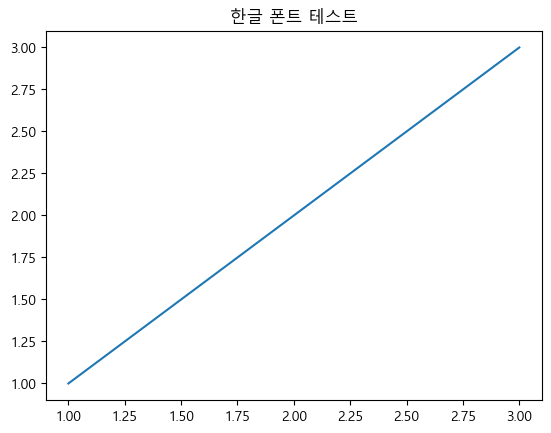

In [33]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 확인용 테스트
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()

count     9220.000000
mean      5032.234273
std       5587.462527
min        300.000000
25%       1200.000000
50%       3000.000000
75%       7000.000000
max      74100.000000
Name: 실제판매금액, dtype: float64


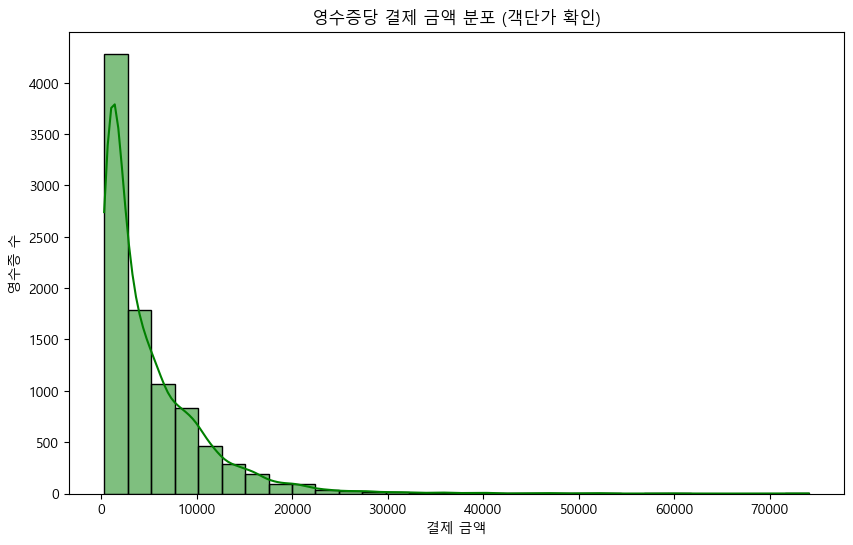

In [34]:
# 승인번호별 매출
# 승인번호 = 영수증 하나. 손님 한 명의 장바구니
# 1. 승인번호별 총 결제 금액 계산
revenue_per_receipt = icecream.groupby('승인번호')['실제판매금액'].sum()

# 2. 기초 통계량 확인 (평균적으로 얼마 쓰는지)
print(revenue_per_receipt.describe())

# 3. 결제 금액 구간별 히스토그램 (가게 성격 파악용)
plt.figure(figsize=(10, 6))
sns.histplot(revenue_per_receipt, bins=30, kde=True, color='green')
plt.title('영수증당 결제 금액 분포 (객단가 확인)')
plt.xlabel('결제 금액')
plt.ylabel('영수증 수')
plt.show()

- 평균 약 5032원 : 손님 한 명이 한 번 왔을 때 평균적으로 5000원 지출
- 중앙값(50%) 3,000원: 전체 결제의 절반은 3,000원 이하입니다.

해석: 평균이 중앙값보다 높다는 것은, 간혹 엄청나게 많이 사가는 '큰 손' 고객들이 평균을 위로 끌어올리고 있다는 뜻입니다.
75% 지점 7,000원: 전체 손님의 75%가 7,000원 이내로 구매합니다. 낱개로 5~10개 내외를 고르는 일반적인 무인 아이스크림 점포의 전형적인 모습입니다.

표준편차(std) 5,587원: "구매량의 변동이 큼"
표준편차가 평균보다 큽니다. 이는 손님마다 구매하는 양의 차이가 어마어마하다는 것을 의미합니다.

그냥 한두 개 사 가는 사람과, 한 봉지 가득 담아가는 사람이 공존하는 매장입니다.

In [29]:
# 1. 수집 기간 계산 (+1을 해야 시작일과 종료일을 모두 포함한 총 날짜가 됩니다)
start_date = icecream['승인일자'].min()
end_date = icecream['승인일자'].max()

collection_period = (end_date - start_date).days + 1
print(f"수집 기간: {collection_period}일 ({start_date.date()} ~ {end_date.date()})")

# 2. 총 승인 건수
total_approvals = icecream['승인번호'].nunique()
print(f"총 승인 건수: {total_approvals}건")

# 3. 하루 평균 승인 건수
average_approvals_per_day = total_approvals / collection_period
print(f"하루 평균 승인 건수: {average_approvals_per_day:.2f}건")

수집 기간: 507일 (2021-02-15 ~ 2022-07-06)
총 승인 건수: 9220건
하루 평균 승인 건수: 18.19건


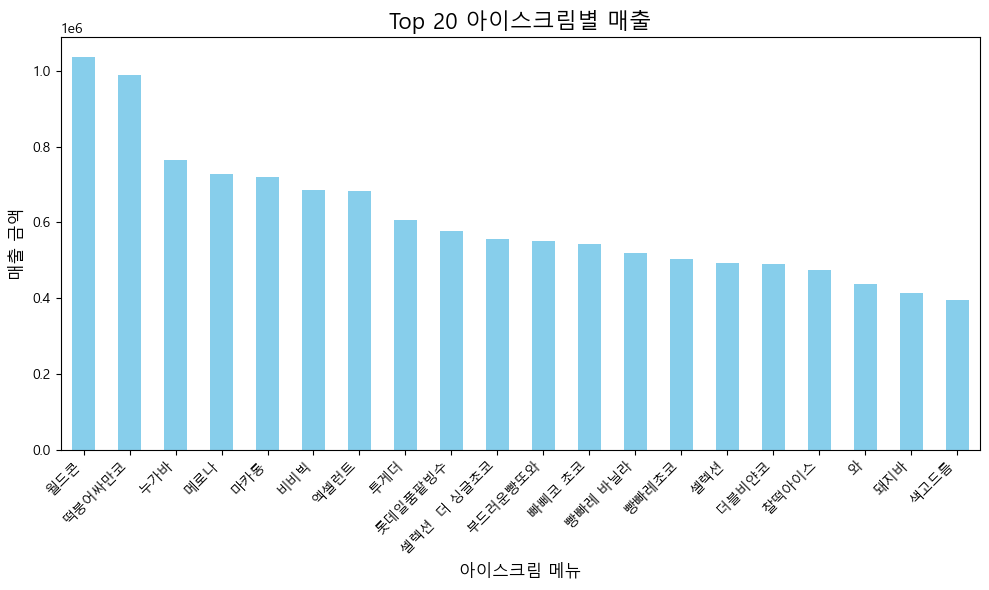

In [35]:
# 상위 20개의 아이스크림 매출 추출
top_20_revenue = revenue_by_icecream.head(20)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
top_20_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 20 아이스크림별 매출', fontsize=16)
plt.xlabel('아이스크림 메뉴', fontsize=12)
plt.ylabel('매출 금액', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# 요일별 매출

# 요일 추출
icecream['요일'] = icecream['영업일자'].dt.day_name()

# 요일별 매출 계산
revenue_by_day = icecream.groupby('요일')['판매가격'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 매출이 높은 순으로 정렬
revenue_by_day_sorted = revenue_by_day.sort_values(ascending=False)
revenue_by_day_sorted

요일
Saturday     5202500.0
Sunday       5196000.0
Friday       4796400.0
Thursday     4324500.0
Wednesday    4259900.0
Tuesday      3928300.0
Monday       3676300.0
Name: 판매가격, dtype: float64

In [31]:
# 주중과 주말 구분
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# 주중, 주말 매출 평균 계산
weekday_revenue = revenue_by_day[revenue_by_day.index.isin(weekday)].mean()
weekend_revenue = revenue_by_day[revenue_by_day.index.isin(weekend)].mean()

# 출력
print(f"주중 평균 매출: {weekday_revenue:.2f}")
print(f"주말 평균 매출: {weekend_revenue:.2f}")

주중 평균 매출: 4197080.00
주말 평균 매출: 5199250.00


- 요일별 매출은 직관과 일치. 주중보다 주말의 매출이 약 1.23배 높음
- 주말에 가까워질 수록 매출이 높은 경향이 있음

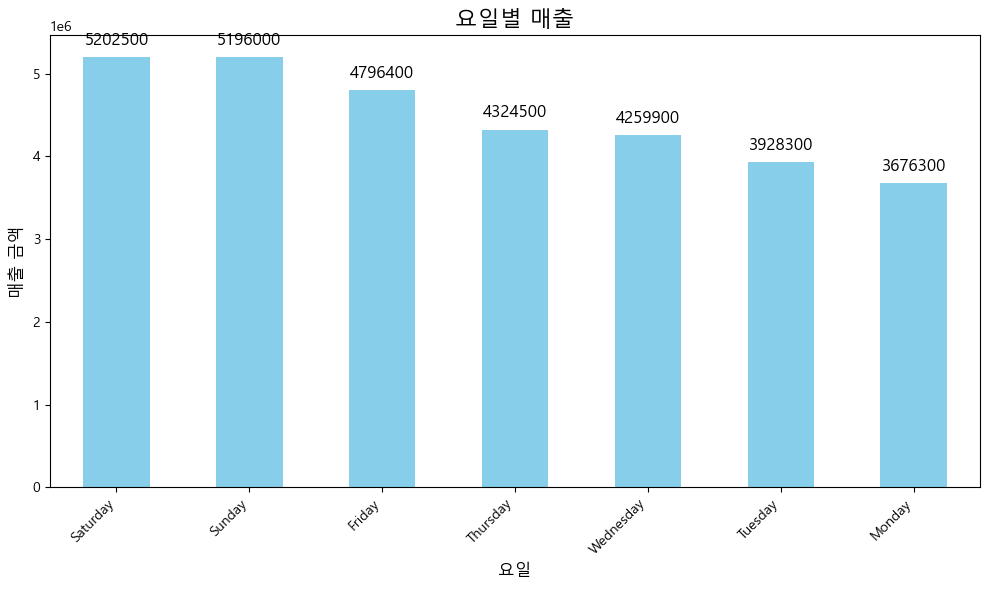

In [36]:
# 요일별 매출 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
ax = revenue_by_day_sorted.plot(kind='bar', color='skyblue')

# 막대 위에 수치 표시
for i, v in enumerate(revenue_by_day_sorted):
    ax.text(i, v + 100000, f'{v:.0f}', ha='center', va='bottom', fontsize=12)

# 제목 및 레이블 설정
plt.title('요일별 매출', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('매출 금액', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# 월별 매출

# '승인일자'에서 월 정보만 추출하여 문자열로 변환
icecream['월'] = icecream['승인일자'].dt.strftime('%Y-%m')

# 월별 매출 계산
revenue_by_month = icecream.groupby('월')['판매가격'].sum()
print(revenue_by_month)

월
2021-02     795900.0
2021-03    1680200.0
2021-04    1898300.0
2021-05    2336300.0
2021-06    2376600.0
2021-07    2827900.0
2021-08    2384200.0
2021-09    2098900.0
2021-10    1611000.0
2021-11    1321300.0
2021-12    1268100.0
2022-01    1467600.0
2022-02    1096900.0
2022-03    1753700.0
2022-04    1834600.0
2022-05    2029000.0
2022-06    2238100.0
2022-07     365300.0
Name: 판매가격, dtype: float64


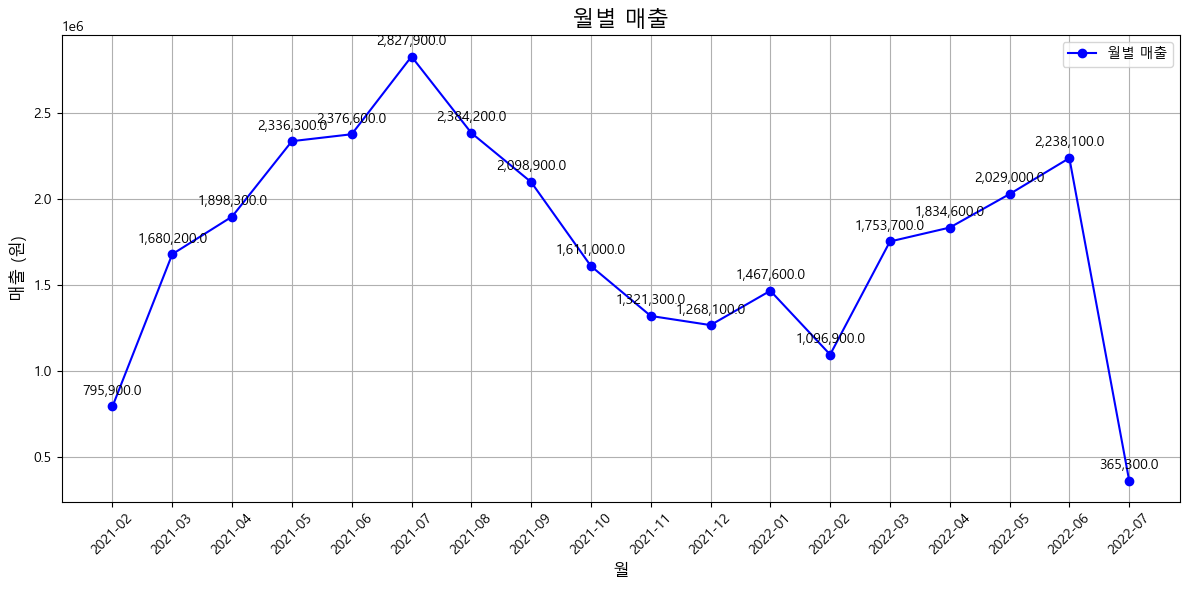

In [37]:
# 월별 매출 시각화 (선그래프)
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index.astype(str), revenue_by_month.values, marker='o', color='b', label='월별 매출')

# 그래프 꾸미기
plt.title('월별 매출', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('매출 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 수치 표시
for i, v in enumerate(revenue_by_month.values):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()

- 대체로 겨울보다 여름에 매출이 높다. 직관과 일치하는 결과
- 2022년 3월 전체적인 판매가 인상이 있었다.
- 2022년 7월은 폐업으로 인한 정리세일을 진행했다.

In [38]:
print(icecream['승인시간'].head(10))  # 데이터 샘플 확인
print(icecream['승인시간'].dtype)     # 데이터 유형 확인

1     11:04:42
2     11:04:42
3     11:04:42
4     11:04:42
5     11:04:42
6     11:04:42
7     11:04:42
8     11:20:37
9     11:20:37
10    11:20:37
Name: 승인시간, dtype: object
object


In [39]:
# 승인시간을 datetime 형식으로 변환 (시간만 남기기)
icecream['승인시간'] = pd.to_datetime(icecream['승인시간'], format='%H:%M:%S', errors='coerce')
icecream['승인시간']

1       1900-01-01 11:04:42
2       1900-01-01 11:04:42
3       1900-01-01 11:04:42
4       1900-01-01 11:04:42
5       1900-01-01 11:04:42
                ...        
36881   1900-01-01 17:34:11
36882   1900-01-01 17:36:29
36883   1900-01-01 17:36:29
36884   1900-01-01 18:04:48
36885   1900-01-01 17:51:59
Name: 승인시간, Length: 36885, dtype: datetime64[us]

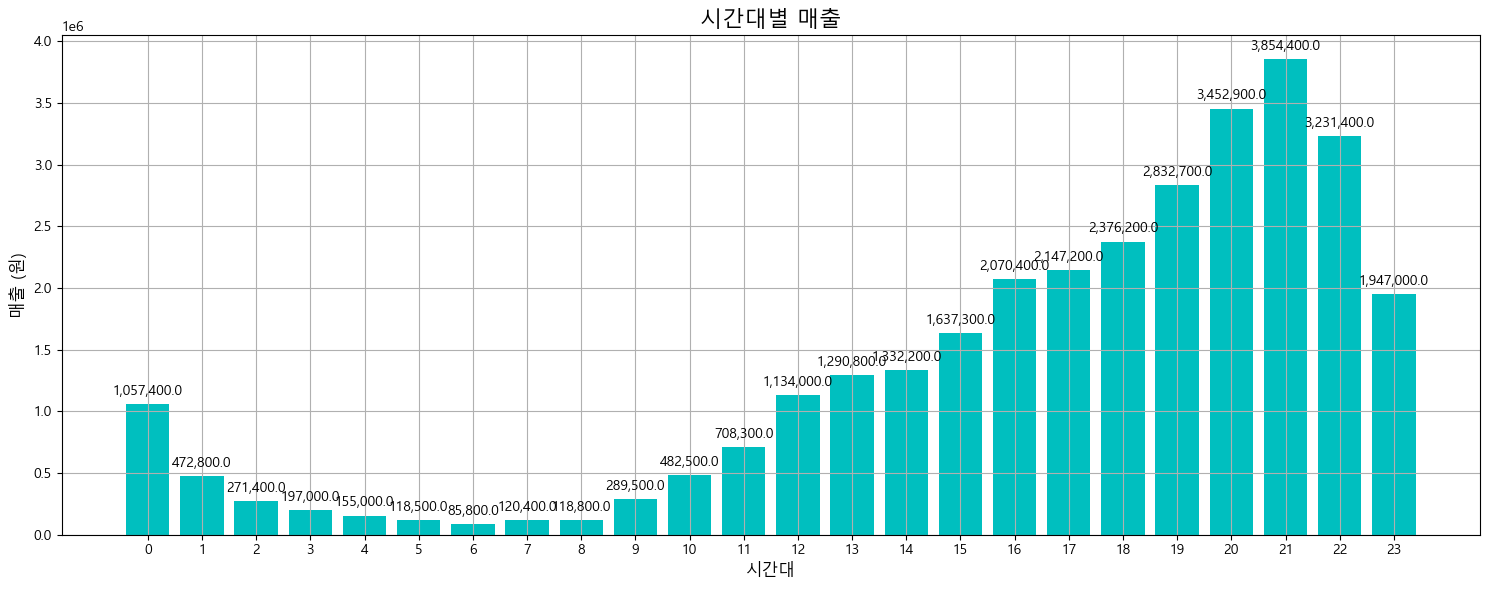

In [41]:
# 시간대별 매출

# 1. 시간만 추출

icecream['시간대'] = icecream['승인시간'].dt.hour

# 2. 시간대별 매출 계산
revenue_by_hour = icecream.groupby('시간대')['판매가격'].sum()

# 3. 시간대별 매출 시각화 (막대그래프)
plt.figure(figsize=(15, 6))
plt.bar(revenue_by_hour.index, revenue_by_hour.values, color='c')

# 그래프 꾸미기
plt.title('시간대별 매출', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('매출 (원)', fontsize=12)
plt.xticks(range(24))  # 0~23 시간대 표시
plt.grid(True)
plt.tight_layout()

# 수치 표시
for i, v in enumerate(revenue_by_hour.values):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.show()

- 아이스크림 가게가 아파트 단지와 주택가 근처에 위치하고 있어 고객들이 하루 일과를 마치고 가게에 들러 많은 거래가 이루어질 것이라 생각했는데 예상과는 달리 21시에 가장 많은 매출을 보임(일반적인 퇴근시간이라고 보기에 다소 늦은 시간)
- 아이스크림 가게 주변에 초등학교가 위치하고 있어서 13시-14시 매출이 높을 줄 알았지만 생각보다 높지 않은 매출

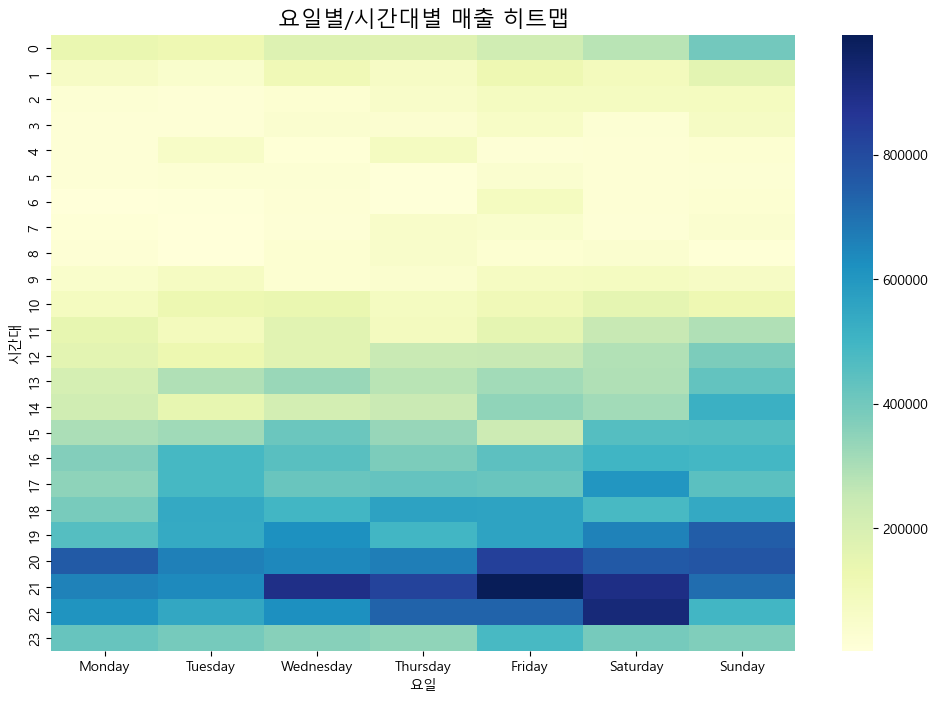

In [42]:
# 요일별 시간대 히트맵

# 1. 요일과 시간대를 기준으로 피벗 테이블 생성
# 요일 순서를 맞추기 위해 정렬 필요
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = icecream.pivot_table(index='시간대', columns='요일', values='실제판매금액', aggfunc='sum').reindex(columns=day_order)

# 2. 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', fmt='.0f')
plt.title('요일별/시간대별 매출 히트맵', fontsize=16)
plt.show()

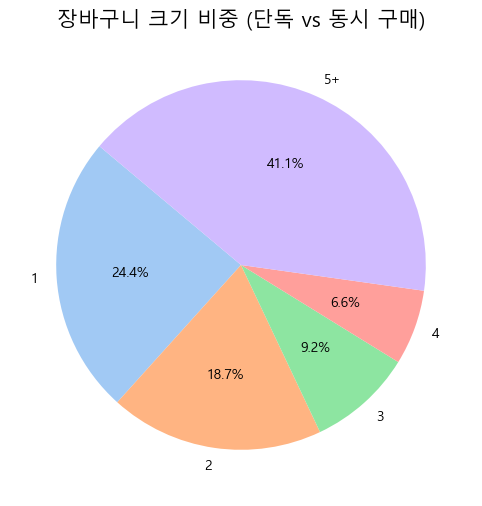

평균 구매 수량: 6.62개
최다 구매 수량: 96개


In [ ]:
# 단독 구매 vs 동시 구매 비중 (Basket Size)

# 1. 승인번호별 구매 품목 수 계산 (중복 메뉴 포함 여부에 따라 달라질 수 있음)
# 여기서는 '판매수량'의 합계를 구하여 실제 몇 개를 샀는지 확인합니다.
basket_size = icecream.groupby('승인번호')['판매수량'].sum().astype(int)

# 2. 구매 수량별 빈도 계산
basket_counts = basket_size.value_counts().sort_index()

# 3. 시각화 (단독 구매 vs 2개 이상 구매)
# 데이터가 너무 퍼질 수 있으므로 '5개 이상'은 하나로 묶어주는 것이 깔끔합니다.
basket_size_grouped = basket_size.apply(lambda x: str(x) if x < 5 else '5+')
final_counts = basket_size_grouped.value_counts().reindex(['1', '2', '3', '4', '5+'])

plt.figure(figsize=(10, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('장바구니 크기 비중 (단독 vs 동시 구매)', fontsize=15)
plt.show()

# 4. 기초 통계량 확인
print(f"평균 구매 수량: {basket_size.mean():.2f}개")
print(f"최다 구매 수량: {basket_size.max()}개")

단독 구매(1개) 비중이 압도적일 때 (예: 60% 이상):

상권: 학원가나 학교 근처일 확률이 매우 높습니다. 학생들이 하교하며 가볍게 하나씩 사 먹는 형태입니다.

전략: 계산대 근처에 낱개로 팔기 좋은 저가형 신제품 배치를 강화하세요.

동시 구매(3개 이상) 비중이 높을 때:

상권: 아파트 단지나 주거 밀집 지역입니다. 가족이 함께 먹으려고 대량으로 사 가는 '비축형 소비'가 일어나는 곳입니다.

전략: 5개입/10개입 번들 상품이나 '골라담기' 할인 이벤트를 제안하는 근거가 됩니다.

최대 구매 수량 확인:

아까 확인한 최대 결제액 74,100원 손님이 몇 개를 샀는지 이 분석에서 드러날 거예요. 만약 50개 이상이라면 단체 주문이나 명절용 선물 수요 등을 유추할 수 있습니다.

In [44]:
# 1. 승인번호별 총 결제금액 다시 계산 (가장 높은 금액 찾기)
receipt_totals = icecream.groupby('승인번호')['실제판매금액'].sum()
max_receipt_no = receipt_totals.idxmax()
max_revenue = receipt_totals.max()

# 2. 해당 승인번호의 상세 품목 리스트 추출
top_customer_basket = icecream[icecream['승인번호'] == max_receipt_no]

print(f"--- 최대 결제 금액 영수증 분석 ---")
print(f"승인번호: {max_receipt_no}")
print(f"총 결제액: {max_revenue:,.0f}원")
print(f"결제 일시: {top_customer_basket['승인일자'].iloc[0]} {top_customer_basket['승인시간'].iloc[0]}")
print(f"총 구매 수량: {top_customer_basket['판매수량'].sum()}개")
print("-" * 35)
print(top_customer_basket[['메뉴명', '판매가격', '판매수량', '실제판매금액']])

--- 최대 결제 금액 영수증 분석 ---
승인번호: 72870215.0
총 결제액: 74,100원
결제 일시: 2021-08-04 00:00:00 1900-01-01 01:04:15
총 구매 수량: 57.0개
-----------------------------------
            메뉴명    판매가격  판매수량  실제판매금액
15040       캔디바   400.0   2.0   800.0
15041       메로나   400.0   3.0  1200.0
15042     샤인머스켓   400.0   2.0   800.0
15043       쌍쌍바   400.0   2.0   800.0
15044       수박바   400.0   3.0  1200.0
15045       누가바   400.0   2.0   800.0
15046   촉촉한 고구마  1200.0   3.0  3600.0
15047   롯데일품팥빙수  1500.0   4.0  6000.0
15048     더블비얀코  1000.0   4.0  4000.0
15049       비빙수  1500.0   3.0  4500.0
15050   투게더미니어처  2000.0   2.0  4000.0
15051  떡또아 티라미수  1000.0   2.0  2000.0
15052    떡붕어싸만코  1000.0   4.0  4000.0
15053      팽이팽이  5500.0   1.0  5500.0
15054         와  1000.0   2.0  2000.0
15055      엑셀런트  6000.0   1.0  6000.0
15056       거북알   600.0   2.0  1200.0
15057       비비빅   400.0   2.0   800.0
15058   스크류바 피치   400.0   1.0   400.0
15059       셀렉션  5500.0   1.0  5500.0
15060       투게더  5500.0   1.0  5500.0
15061     

고객 페르소나: "냉장고 채우는 주부/가족"
구매 패턴: 400원짜리 바류(메로나, 수박바 등)부터 1,000~1,500원대 콘/샌드류(국화빵, 떡붕어싸만코), 그리고 5,500~6,000원대 고가 홈타입(팽이팽이, 엑셀런트)까지 전 카테고리를 골고루 담았습니다.

결정적 증거: 품목 수가 매우 다양하고(총 57개), 수량도 품목당 2~4개씩 일정합니다. 이는 특정 단체 간식보다는 가족 구성원들의 각자 취향을 모두 반영하여 일주일 치 간식을 한꺼번에 사재기하는 전형적인 주거지 상권의 큰 손 모습입니다.

결제 시간: 새벽 1시 4분입니다. 무인 매장의 핵심 장점인 '24시간 운영' 덕분에 가능했던 매출이네요.

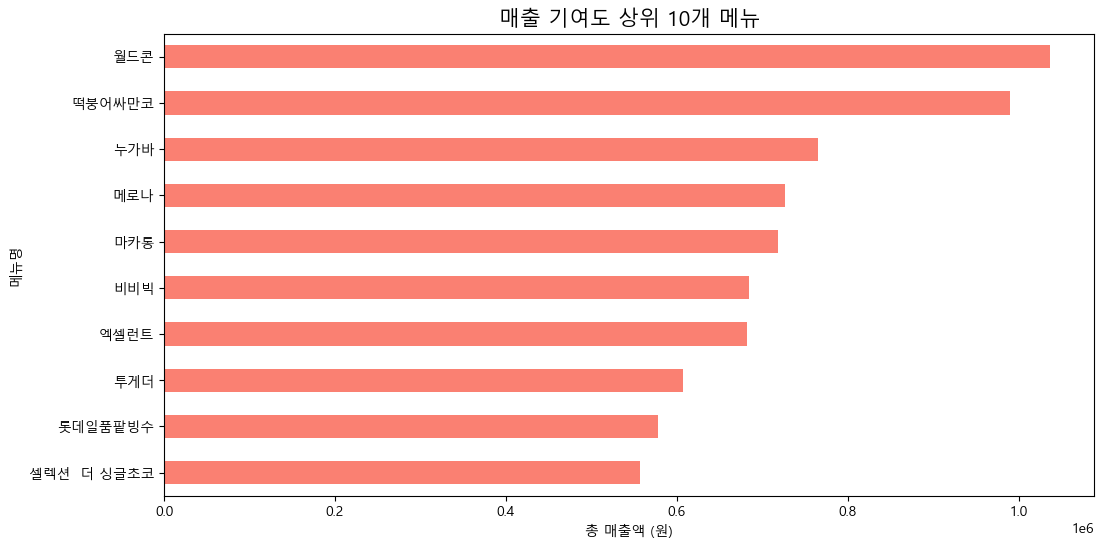

In [45]:
# 메뉴별 총 매출액 합계 상위 10개 추출
top_menus = icecream.groupby('메뉴명')['실제판매금액'].sum().sort_values(ascending=False).head(10)

# 시각화
plt.figure(figsize=(12, 6))
top_menus.plot(kind='barh', color='salmon')
plt.title('매출 기여도 상위 10개 메뉴', fontsize=15)
plt.xlabel('총 매출액 (원)')
plt.gca().invert_yaxis() # 높은 순서대로 위에서부터 표시
plt.show()

C:\Users\09048\AppData\Local\Temp\ipykernel_1672\2463715487.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_analysis, x='고객등급', y='영수증수', ax=ax1, palette='Blues')


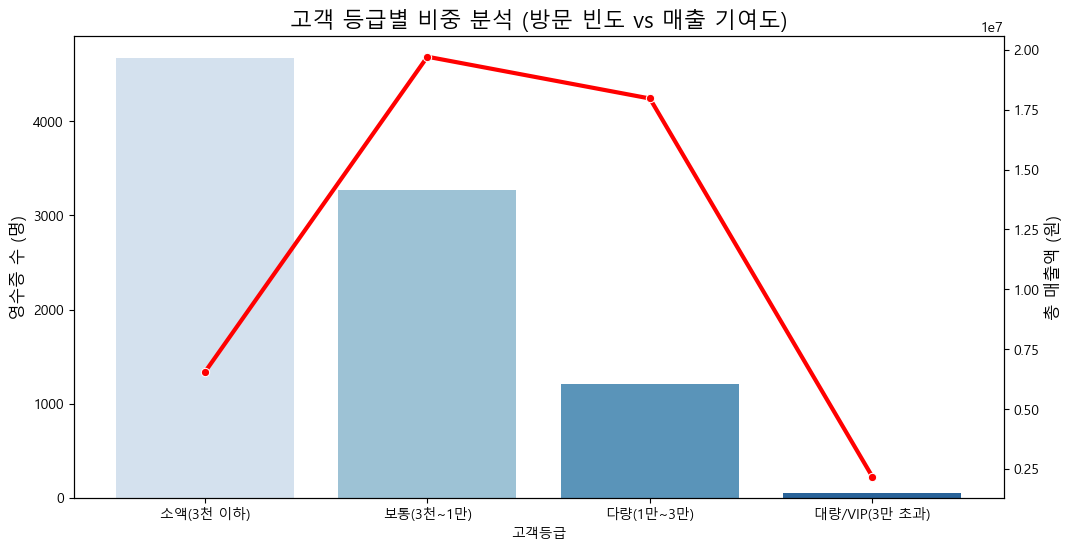

            고객등급  영수증수        총매출액
0      소액(3천 이하)  4677   6543300.0
1      보통(3천~1만)  3274  19713900.0
2      다량(1만~3만)  1214  17969000.0
3  대량/VIP(3만 초과)    55   2171000.0


In [46]:
# 객단가 구간별 고객 세분화 (Customer Segmentation)
# 우리 가게를 먹여 살리는 진짜 우량 고객은 누구인가?

# 1. 영수증별 총 결제 금액 계산
receipt_summary = icecream.groupby('승인번호')['실제판매금액'].sum().reset_index()

# 2. 고객 세그먼트(구간) 정의
# 기준: 3천원 이하(소액), 3천원~1만원(보통), 1만원~3만원(다량), 3만원 초과(대량/VIP)
bins = [0, 3000, 10000, 30000, float('inf')]
labels = ['소액(3천 이하)', '보통(3천~1만)', '다량(1만~3만)', '대량/VIP(3만 초과)']

receipt_summary['고객등급'] = pd.cut(receipt_summary['실제판매금액'], bins=bins, labels=labels)

# 3. 그룹별 통계 (영수증 수와 매출 합계)
segment_analysis = receipt_summary.groupby('고객등급').agg(
    영수증수=('승인번호', 'count'),
    총매출액=('실제판매금액', 'sum')
).reset_index()

# 4. 시각화: 영수증 수 vs 총 매출액 비중 비교
fig, ax1 = plt.subplots(figsize=(12, 6))

# 영수증 수 (막대 그래프)
sns.barplot(data=segment_analysis, x='고객등급', y='영수증수', ax=ax1, palette='Blues')
ax1.set_ylabel('영수증 수 (명)', fontsize=12)

# 총 매출액 (선 그래프)
ax2 = ax1.twinx()
sns.lineplot(data=segment_analysis, x='고객등급', y='총매출액', ax=ax2, color='red', marker='o', linewidth=3)
ax2.set_ylabel('총 매출액 (원)', fontsize=12)

plt.title('고객 등급별 비중 분석 (방문 빈도 vs 매출 기여도)', fontsize=16)
plt.show()

# 데이터 확인
print(segment_analysis)

핵심 인사이트: "50%의 손님이 14%의 매출만 만든다"
소액 그룹의 한계: 전체 방문객의 절반(50.7%)이 3,000원 이하로 구매하지만, 이들이 만들어내는 매출은 전체의 14%에 불과합니다. 즉, "사람은 북적이는데 정작 남는 게 적은" 구간입니다.

황금 알을 낳는 거위 (보통~다량): 전체 방문객의 약 48%를 차지하는 '보통'과 '다량' 그룹이 **전체 매출의 약 81%**를 책임지고 있습니다. 이들이 이 가게의 진짜 주인입니다.

결론: 이 매장은 단순히 지나가는 사람들을 위한 '쉼터'라기보다, **집에 가져가려고 묶음으로 사는 '목적형 구매'**가 일어날 때 수익이 극대화되는 구조입니다.

--- ABC 분석 요약 ---
  등급  상품수         매출액       매출비중
0  A  121  32429600.0  69.895597
1  B  160   9299700.0  20.043666
2  C  353   4667900.0  10.060736


C:\Users\09048\AppData\Local\Temp\ipykernel_1672\3102396197.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=menu_analysis.head(20), x='메뉴명', y='실제판매금액', ax=ax1, palette='magma')
C:\Users\09048\AppData\Local\Temp\ipykernel_1672\3102396197.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


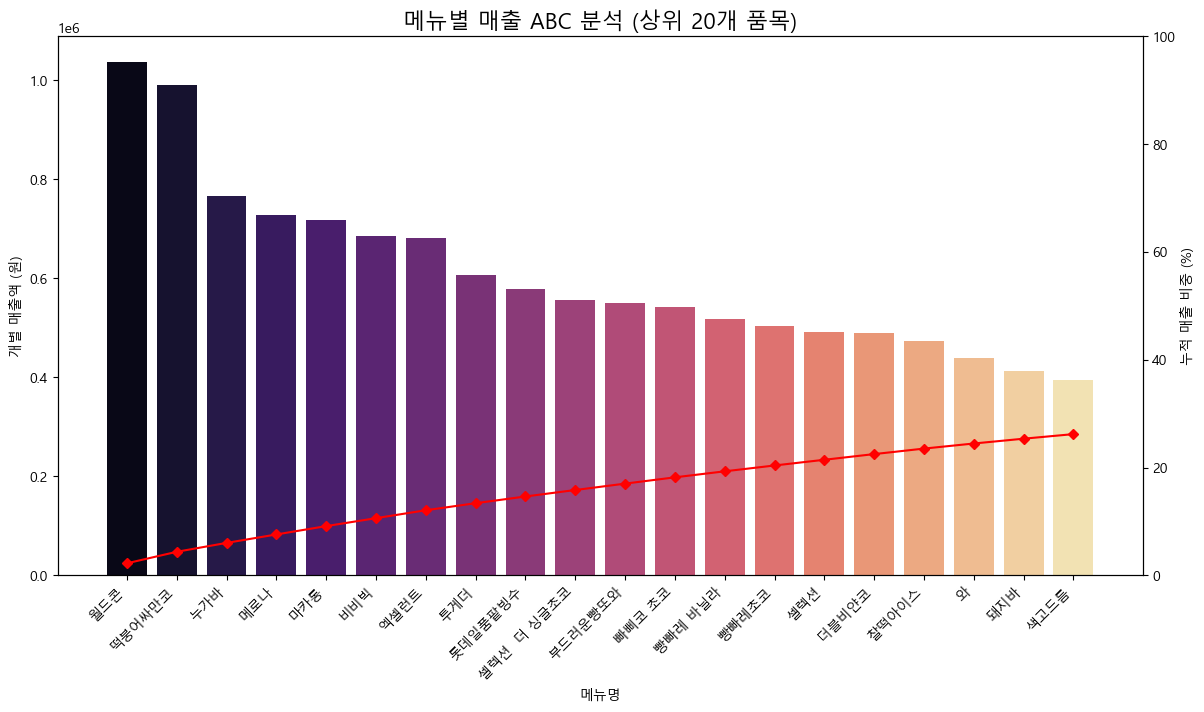


--- A등급(핵심) 상품 상위 10개 ---
           메뉴명     실제판매금액       누적비중
0          월드콘  1036400.0   2.233755
1       떡붕어싸만코   989600.0   4.366643
2          누가바   765500.0   6.016527
3          메로나   726800.0   7.583001
4          마카롱   718400.0   9.131370
5          비비빅   684200.0  10.606028
6         엑셀런트   681500.0  12.074867
7          투게더   607000.0  13.383135
8      롯데일품팥빙수   578000.0  14.628900
9  셀렉션  더 싱글초코   556500.0  15.828326


In [ ]:
# 메뉴별 abc 분석 
# 각 메뉴의 매출액을 내림차순으로 정렬한 뒤, 누적 매출 비중을 계산하여 등급을 매깁니다

# 1. 메뉴별 총 매출액 계산 및 정렬
menu_analysis = icecream.groupby('메뉴명')['실제판매금액'].sum().sort_values(ascending=False).reset_index()

# 2. 누적 매출 및 누적 비중 계산
menu_analysis['누적매출액'] = menu_analysis['실제판매금액'].cumsum()
total_revenue = menu_analysis['실제판매금액'].sum()
menu_analysis['누적비중'] = (menu_analysis['누적매출액'] / total_revenue) * 100

# 3. ABC 등급 부여
# A: 누적 비중 0~70% (핵심 상품)
# B: 누적 비중 70~90% (전략 상품)
# C: 누적 비중 90~100% (관리/퇴출 후보)
def get_abc_grade(percentage):
    if percentage <= 70:
        return 'A'
    elif percentage <= 90:
        return 'B'
    else:
        return 'C'

menu_analysis['등급'] = menu_analysis['누적비중'].apply(get_abc_grade)

# 4. 등급별 요약 통계
abc_summary = menu_analysis.groupby('등급').agg(
    상품수=('메뉴명', 'count'),
    매출액=('실제판매금액', 'sum')
).reset_index()
abc_summary['매출비중'] = (abc_summary['매출액'] / total_revenue) * 100

print("--- ABC 분석 요약 ---")
print(abc_summary)

# 5. 시각화 (파레토 차트)
fig, ax1 = plt.subplots(figsize=(14, 7))

# 막대 그래프 (개별 매출)
sns.barplot(data=menu_analysis.head(20), x='메뉴명', y='실제판매금액', ax=ax1, palette='magma')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel('개별 매출액 (원)')

# 선 그래프 (누적 비중)
ax2 = ax1.twinx()
ax2.plot(menu_analysis.head(20).index, menu_analysis.head(20)['누적비중'], color='red', marker='D', ms=5)
ax2.set_ylabel('누적 매출 비중 (%)')
ax2.set_ylim(0, 100)

plt.title('메뉴별 매출 ABC 분석 (상위 20개 품목)', fontsize=16)
plt.show()

# A등급 상품 리스트 확인
print("\n--- A등급(핵심) 상품 상위 10개 ---")
print(menu_analysis[menu_analysis['등급'] == 'A'][['메뉴명', '실제판매금액', '누적비중']].head(10))

A등급 (핵심 상품 - 매출의 70% 차지):

의미: 전체 상품 중 수는 적지만 매출의 대부분을 만드는 '효자 상품'들입니다.

전략: 이 상품들은 절대 품절되면 안 됩니다. 재고 확인 주기를 가장 짧게 잡고, 가장 눈에 띄는 골든 존(Golden Zone)에 배치해야 합니다.

B등급 (전략 상품 - 누적 70~90% 구간):

의미: 꾸준히 팔리지만 A등급만큼 폭발적이지는 않은 상품들입니다.

전략: A등급 상품과 연관 구매가 일어나도록 근처에 진열하거나, 1+1 이벤트 등을 통해 A등급으로 격상을 시도해 볼 만한 품목입니다.

C등급 (관리/퇴출 후보 - 마지막 10% 구간):

의미: 품목 수는 엄청나게 많지만 매출 기여도는 매우 낮습니다.

전략: 매장의 공간 효율을 떨어뜨리는 주범일 수 있습니다. 재고 회전율이 너무 낮다면 **품목 삭제(Delisting)**를 검토하거나 신상품을 위한 자리를 비워줘야 합니다.

# 단골손님 분석

In [ ]:
# 가상 고객 id 생성하여 방문 빈도 분석(고객 세분화)
# 1. 카드사 + 카드번호 조합하여 고유 ID 생성
# 두 컬럼을 문자열로 변환하여 합칩니다.
icecream['고객ID'] = icecream['매입사'].astype(str) + '_' + icecream['카드번호'].astype(str)

# 2. 고객별 총 방문 횟수(영수증 기준) 계산
# 한 번 방문 시 여러 품목을 사므로 '승인번호'의 중복을 제거하고 카운트합니다.
customer_stats = icecream.groupby('고객ID')['승인번호'].nunique().reset_index()
customer_stats.columns = ['고객ID', '방문횟수']

# 3. 가설 검증: 방문 횟수별 그룹화
def get_customer_type(count):
    if count == 1: return '체험객(1회)'
    elif 2 <= count <= 4: return '일반(2-4회)'
    elif 5 <= count <= 9: return '우수(5-9회)'
    else: return '단골(10회 이상)'

customer_stats['고객유형'] = customer_stats['방문횟수'].apply(get_customer_type)

# 4. 결과 출력
type_counts = customer_stats['고객유형'].value_counts().reindex(['체험객(1회)', '일반(2-4회)', '우수(5-9회)', '단골(10회 이상)'])
print("--- 고객 유형별 분포 ---")
print(type_counts)

--- 고객 유형별 분포 ---
고객유형
체험객(1회)       103
일반(2-4회)      119
우수(5-9회)       84
단골(10회 이상)    153
Name: count, dtype: int64


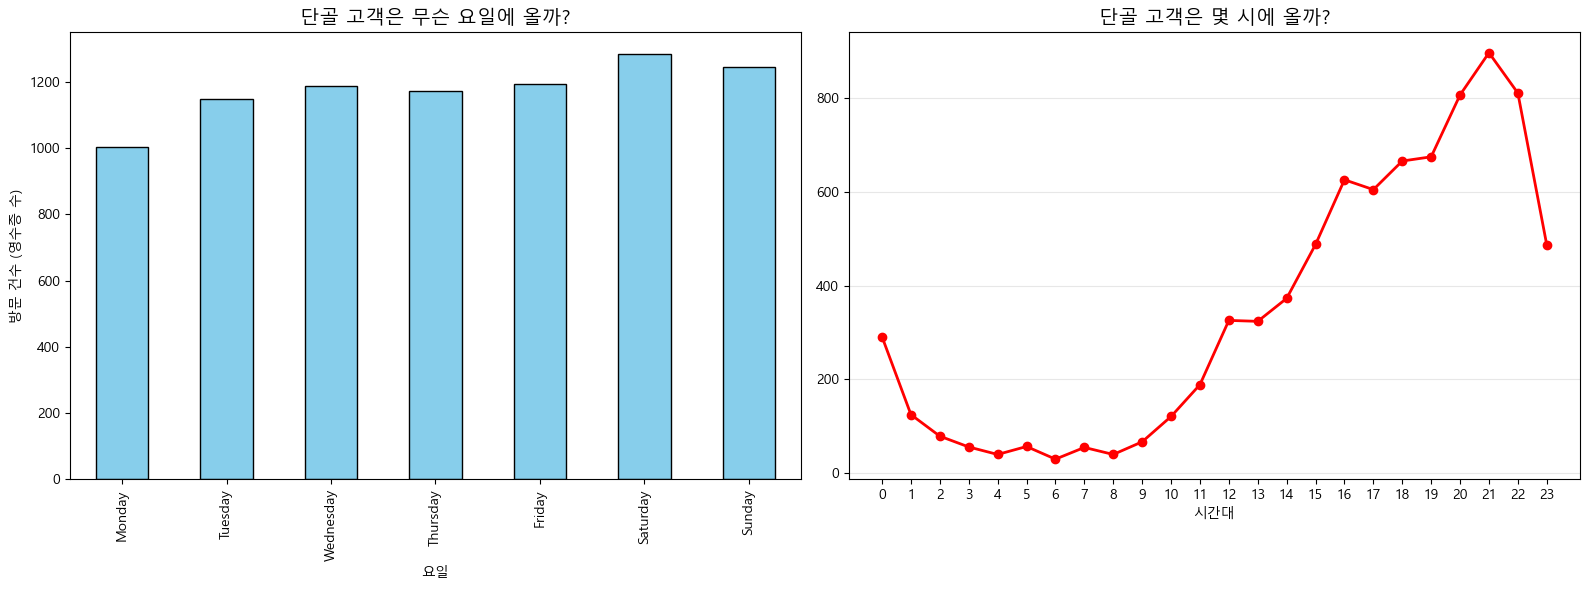

In [50]:
# 단골 고객(10회 이상) 집중 분석

# 1. 단골 고객 ID만 추출
loyal_ids = customer_stats[customer_stats['고객유형'] == '단골(10회 이상)']['고객ID']

# 2. 전체 데이터에서 단골 고객 데이터만 필터링
loyal_df = icecream[icecream['고객ID'].isin(loyal_ids)]

# 3. 단골의 요일별 방문 비중 (영수증 기준)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
loyal_day_visit = loyal_df.groupby('요일')['승인번호'].nunique().reindex(day_order)

# 4. 단골의 시간대별 방문 비중
loyal_hour_visit = loyal_df.groupby('시간대')['승인번호'].nunique()

# 시각화
plt.figure(figsize=(16, 6))

# 요일 그래프
plt.subplot(1, 2, 1)
loyal_day_visit.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('단골 고객은 무슨 요일에 올까?', fontsize=14)
plt.ylabel('방문 건수 (영수증 수)')

# 시간대 그래프
plt.subplot(1, 2, 2)
loyal_hour_visit.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('단골 고객은 몇 시에 올까?', fontsize=14)
plt.xticks(range(24))
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

요일별 패턴 (Saturday Peak):

월요일부터 금요일까지 꾸준히 방문이 늘어나다가 토요일에 정점을 찍습니다.

이는 단골들이 평일 퇴근길뿐만 아니라, 주말에 가족과 함께 먹을 아이스크림을 사러 오는 **'목적형 방문'**을 많이 한다는 증거입니다.

시간대별 패턴 (21시 피크):

오후 3시(15시)부터 방문객이 급증하기 시작하여 밤 9시(21시)에 최대치를 기록합니다.

전형적인 주거지 상권의 모습으로, 저녁 식사 후 온 가족이 디저트를 즐기기 위해 방문하는 **'후식형 소비'**가 단골들의 주된 패턴입니다.

특히 자정(0시)에도 방문 건수가 꽤 높은데, 이는 무인 매장의 24시간 접근성이 단골들에게 큰 메리트가 되고 있음을 보여줍니다.

2. 결제 금액 분포 (Long-tail)
초록색 히스토그램을 보면 대부분의 결제가 10,000원 이하(왼쪽)에 몰려 있지만, 70,000원이 넘는 지점까지 얇고 길게 늘어진 롱테일(Long-tail) 분포를 보입니다.

해석: 가끔 발생하는 대량 구매 고객(74,100원 등)이 전체 매출의 상단을 견인하고 있으며, 단골 고객들이 한 번 올 때 여러 개를 묶어서 사가는 비중이 적지 않음을 시사합니다.

In [51]:
# 1. 고객별/일자별 방문 기록 정렬
visit_history = icecream.groupby(['고객ID', '승인일자']).size().reset_index().sort_values(['고객ID', '승인일자'])

# 2. 다음 방문일과의 차이(간격) 계산
visit_history['이전방문일'] = visit_history.groupby('고객ID')['승인일자'].shift(1)
visit_history['재방문주기'] = (visit_history['승인일자'] - visit_history['이전방문일']).dt.days

# 3. 재방문 주기 분포 확인 (결측치 제외)
revisit_interval = visit_history['재방문주기'].dropna()

print(f"평균 재방문 주기: {revisit_interval.mean():.1f}일")
print(f"중앙값 재방문 주기: {revisit_interval.median():.1f}일")

평균 재방문 주기: 16.2일
중앙값 재방문 주기: 5.0일


중앙값 5.0일: 전체 재방문 기록을 한 줄로 세웠을 때 딱 중간에 있는 값이 5일입니다. 즉, 손님들의 절반은 5일 이내에 다시 옵니다. 이들이 매장을 지탱하는 실질적인 '생활 밀착형' 고객입니다.

평균 16.2일: 중앙값보다 3배나 높습니다. 이는 한두 달 만에 한 번씩 오는 '가끔 방문하는 손님'들이 평균치를 확 끌어올렸다는 뜻입니다.

[그룹 A] 5일 이내 재방문 (핵심 단골):

일주일에 한두 번 이상 꼬박꼬박 들르는 분들입니다.

행동: 아이스크림이 떨어질 때쯤 다시 채우러 오거나, 퇴근길 루틴으로 방문합니다.

전략: 이분들에게는 '질리지 않는 구성'과 '포인트 적립'처럼 계속 올 명분을 주는 것이 중요합니다.

[그룹 B] 30일~60일 이상 재방문 (이벤트성 고객):

아주 가끔 생각나거나, 특정 계절(폭염 등)에만 방문하는 분들입니다.

행동: 이분들이 평균치를 16일로 늘려놓은 주범(?)입니다.

전략: 이분들을 그룹 A로 전환시키기보다는, 한 번 왔을 때 왕창 사 가게 만드는(객단가 높이기) 전략이 효율적입니다.